<a href="https://colab.research.google.com/github/YueWang417/Intro_to_Databases_S23/blob/main/vesuvius_challenge_ink_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import glob
import PIL.Image as Image
import torch.utils.data as data
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from ipywidgets import interact, fixed

In [1]:
# !pip install kaggle
# from google.colab import files
# uploaded = files.upload()
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# !kaggle competitions download -c vesuvius-challenge-ink-detection
# !unzip vesuvius-challenge-ink-detection.zip -d vesuvius-challenge-ink-detection

Mounted at /content/drive
100% 20.6G/20.6G [04:02<00:00, 100MB/s] 
100% 20.6G/20.6G [04:02<00:00, 91.1MB/s]
Archive:  vesuvius-challenge-ink-detection.zip
  inflating: vesuvius-challenge-ink-detection/sample_submission.csv  
  inflating: vesuvius-challenge-ink-detection/test/a/mask.png  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/00.tif  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/01.tif  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/02.tif  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/03.tif  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/04.tif  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/05.tif  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/06.tif  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/07.tif  
  inflating: vesuvius-challenge-ink-detection/test/a/surface_volume/08.tif  
  inflating: vesuv

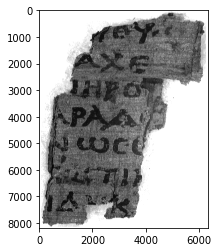

In [5]:
PREFIX = '/content/vesuvius-challenge-ink-detection/train/1/'
BUFFER = 30  # Buffer size in x and y direction
Z_START = 27 # First slice in the z direction to use
Z_DIM = 10   # Number of slices in the z direction
TRAINING_STEPS = 30000
LEARNING_RATE = 0.03
BATCH_SIZE = 32
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

plt.imshow(Image.open(PREFIX+"ir.png"), cmap="gray")